# Linear Regression
In this problem, we explore how to use **linear regression** for classification. This code is implemented to answer questions 5-7 in homework 2 of the Learning from Data course at Caltech: http://work.caltech.edu/homework/hw2.pdf

## Problem Statement
Given a set of N 2D points, each point is labeled with a binary value -1 or +1. Our task is to use **linear regression** to find a line that best separates these points into 2 sets, each set contains as many points with the same label as possible. This line is called the decision boundary: when we receive a new data point, we can just plug it into our system and figure out its label by observing which side of the boundary it falls into.

This is a classification problem. If the data points are linearly separable, this problem can be solved using the **perceptron learning algorithm** which is implemented here: https://github.com/vkhoi/learning-from-data/blob/master/perceptron/perceptron.ipynb. Even though **linear regression** is commonly used to solve the regression problem, here, we are interested in how to apply it into the classification problem.

In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

In [3]:
# class Point 2D
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def asVector(self):
        return [self.x, self.y]
    
    @staticmethod
    def random():
        return Point(random.uniform(-1, 1), random.uniform(-1, 1))

In [4]:
# class Line in the 2D plane
class Line:
    def __init__(self, a, b, c):
        # ax + by + c = 0
        self.a = a
        self.b = b
        self.c = c
    
    # return the point on this line with horizontal coordinate x
    def getPointAtX(self, x):
        if self.b == 0:
            return Point(x, -1)
        return Point(x, (-self.a*x - self.c) / self.b)
    
    # evaluate whether a given point is on the upper or lower area of this line
    def evaluatePoint(self, point):
        return np.sign(self.a*point.x + self.b*point.y + self.c)
    
    # generate a random line equation (equivalent to generating a random target function in our example)
    @staticmethod
    def random():
        # generate two random points
        p1 = Point.random()
        p2 = Point.random()
        
        # compute the perpendicular vector of this line
        u = [-(p2.y - p1.y), p2.x - p1.x]
        return Line(u[0], u[1], -u[0]*p1.x - u[1]*p1.y)

In [5]:
# implementation of linear regression for fitting a set of data points
class LinearRegression:
    # this method receives the data points and finds a weight vector that best fits these points
    @staticmethod
    def fit(X, Y):
        N = len(X) # number of data points
        d = len(X[0]) # size of dimension
        
        # initialize matrix A to store the data points
        A = np.zeros((N, d + 1))
        # initialize column vector b which stores the y values
        b = np.zeros((N, 1))
        for i in range(N):
            A[i] = np.array([1] + X[i])
            b[i] = Y[i]
            
        # approximate Ax = b
        AT = np.transpose(A)
        w = np.dot(np.dot(np.linalg.inv(np.dot(AT, A)), AT), b)

        return w

In [7]:
# perform experiments for answering question 6 and 7
def experiment(N, plot=False):
    # N is the number of data points to generate
    
    # initialize a random line to separate the plane into 2 parts: one for blue points, one for red points
    L = Line.random()

    # initialize N random points
    # X0 and Y0 store the X and Y coordinates of points with label 1
    # X1 and Y1 store the X and Y coordinates of points with label -1
    training_examples = [Point.random() for _ in range(N)]
    X0 = [training_examples[_].x for _ in range(N) if L.evaluatePoint(training_examples[_]) == 1]
    Y0 = [training_examples[_].y for _ in range(N) if L.evaluatePoint(training_examples[_]) == 1]
    X1 = [training_examples[_].x for _ in range(N) if L.evaluatePoint(training_examples[_]) == -1]
    Y1 = [training_examples[_].y for _ in range(N) if L.evaluatePoint(training_examples[_]) == -1]

    # create data to put into the linear regression class for fitting
    X = [training_examples[_].asVector() for _ in range(N)]
    Y = [L.evaluatePoint(training_examples[_]) for _ in range(N)]
    
    # fit the data points
    W = LinearRegression.fit(X, Y)

    # create the line equation using the computed weights
    G = Line(W[1][0], W[2][0], W[0][0])

    if plot:
        print('Figure on the left shows the data points with the target function')
        print('Figure on the right shows the data points with the best fit line')
        fig = plt.figure(figsize=(16, 5))
        ax1 = fig.add_subplot(1, 2, 1)
        ax2 = fig.add_subplot(1, 2, 2)

        ax1.set_xlim(-1, 1)
        ax1.set_ylim(-1, 1)
        ax2.set_xlim(-1, 1)
        ax2.set_ylim(-1, 1)

        ax1.scatter(X0, Y0, color="r")
        ax1.scatter(X1, Y1, color="b")
        ax1.plot((-1, 1), (L.getPointAtX(-1).y, L.getPointAtX(1).y), color="r")

        ax2.scatter(X0, Y0, color="r")
        ax2.scatter(X1, Y1, color="b")
        ax2.plot((-1, 1), (G.getPointAtX(-1).y, G.getPointAtX(1).y), color="b")
        
    return [L, G, training_examples]

Figure on the left shows the data points with the target function
Figure on the right shows the data points with the best fit line


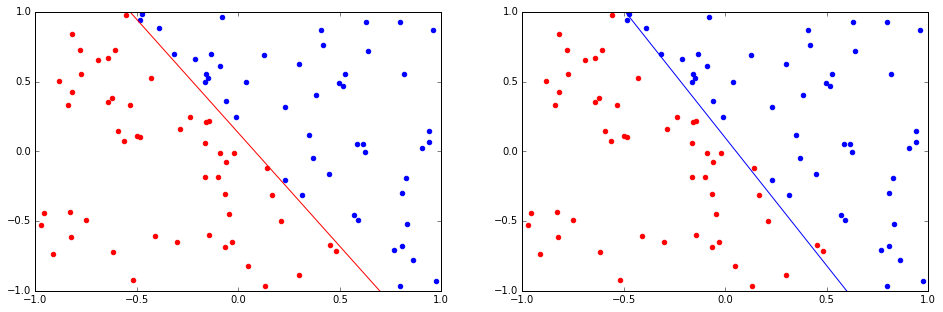

In [10]:
# Example run
[L, G, training_examples] = experiment(100, True)

We can see that **linear regression** is also able to find a good decision boundary. Thus, it can be used as an initial step to find a good weight vector before applying the **perceptron learning algorithm**.

In [11]:
# Question 5: asks to calculate the in-sample error of our best fit line
N_experiments = 1000 # number of experiments
N_points = 100 # number of data points to generate in each experiment
E_in = 0 # in-sample error
for _ in range(N_experiments):
    [L, G, training_examples] = experiment(N_points)
    misclassified = [point for point in training_examples if L.evaluatePoint(point) != G.evaluatePoint(point)]
    E_in += len(misclassified) / N_points
E_in /= N_experiments
print('Question 5: The average value of E_in is ', E_in)

Question 5: The average value of E_in is  0.039270000000000124


In [12]:
# Question 6: asks to calculate the out-sample error of our best fit line
N_experiments = 1000 # number of experiments
N_points = 1000 # number of data points to generate in each experiment
E_out = 0 # out-sample error
for _ in range(N_experiments):
    training_examples = [Point.random() for _ in range(N_points)]
    misclassified = [point for point in training_examples if L.evaluatePoint(point) != G.evaluatePoint(point)]
    E_out += len(misclassified) / N_points
E_out /= N_experiments
print('Question 6: The average value of E_out is ', E_out)

Question 6: The average value of E_out is  0.05688499999999989


From the computed values of E_in and E_out being small, we can see that our linear regression hypothesis approximates well the target function.

In [18]:
class Perceptron:
    def __init__(self, dimensions):
        self.dimensions = dimensions
        
        # the weights vector is appended with one extra element for the bias term
        self.weights = [0 for _ in range(dimensions + 1)]
        
    def setWeight(self, weights):
        self.weights = weights
    
    # evaluate the weighted sum of the current weights vector and the input vector
    def evaluate(self, inputs):
        if (len(inputs) != self.dimensions):
            raise Exception()
        return sum([val * weight for (val, weight) in zip([1] + inputs, self.weights)])
    
    # classify the input point
    def classify(self, point):
        return np.sign(self.evaluate(point.asVector()))
    
    # update the weights vector
    def learn(self, point, label):
        self.weights = [w + label*x for (w, x) in zip(self.weights, [1] + point.asVector())]

In [24]:
# Question 7: asks to count the average number of iterations for the perceptron to converge, after using linear
# regression to find the initial weights for the perceptron
N_experiments = 1000
N_points = 10
sum_iters = 0
for _ in range(N_experiments):
    [L, G, training_examples] = experiment(N_points)
    perceptron = Perceptron(2)
    perceptron.setWeight([G.c, G.a, G.b])
    
    misclassified = [point for point in training_examples if perceptron.classify(point) != L.evaluatePoint(point)]
    num_iters = 0
    while misclassified:
        num_iters += 1
        # choose a random misclassified point
        point = random.choice(misclassified)
        # update new weights according to this point
        perceptron.learn(point, L.evaluatePoint(point))
        # find the misclassified again
        misclassified = [point for point in training_examples if perceptron.classify(point) != L.evaluatePoint(point)]
    sum_iters += num_iters
print('Question 7: The average number of iterations is ', sum_iters / N_experiments)

Question 7: The average number of iterations is  3.75
